In [120]:
#Set a random seed to make reproducability
import numpy as np
np.random.seed(42)

In [121]:
#Set x to be values between 0 and 2
#Set y to be values 4 + 0 + (normal distribution) to 4 + 6 + (normal distribution)

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

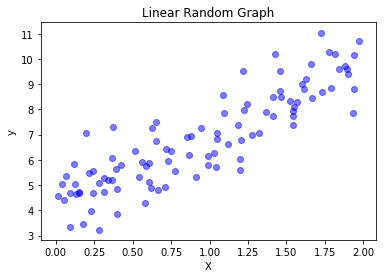

In [122]:
#scatterplot the data given
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(x=X, y=y, color='b', alpha=.5)
plt.title('Linear Random Graph')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

<img src="images/Chapter4/NormalizationEquation.png">

In [123]:
#Set the b value to 1 and add it as a column to the X set
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [124]:
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

In [125]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
print(X_new_b)
y_predict = X_new_b.dot(theta_best)

[[ 1.  0.]
 [ 1.  2.]]


In [126]:
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

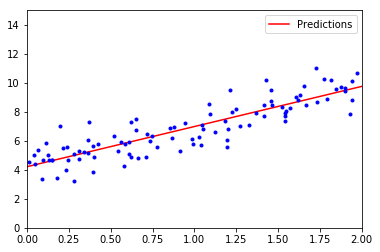

In [127]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.legend(['Predictions'])
plt.show()

In [128]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.21509616]), array([[ 2.77011339]]))

In [129]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

# Batch Gradient Descent

<img src="images/Chapter4/BatchGradientDescent.png">

<img src="images/Chapter4/BatchGradientDescent2.png">

In [130]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #random intialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[ 4.21509616]
 [ 2.77011339]]


In [131]:
X_new_b.dot(theta)

array([[ 4.21509616],
       [ 9.75532293]])

# Stochastic Gradient Descent

In [132]:
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [133]:
theta

array([[ 4.21076011],
       [ 2.74856079]])

In [134]:
#This is the code that we will use. above is the code that
#is happening in greater detail
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [135]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.23166744]), array([ 2.79099659]))

In [136]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [137]:
#Use of PolynomialFeatures to fit a non linear dataset
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[ 1.97322766]
[ 1.97322766  3.89362739]


In [138]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.19573036]), array([[ 1.00978737,  0.4681429 ]]))

#### This above array is the same as the equation 
#### y=.501x^2 + .985x + 2.072

In [142]:
####DO THE GRAPHS LATER WILL BE USEFUL WHEN TESTING YOUR DATA
####
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    plt.legend(['Training set', 'Test set'], title='Sets')
    

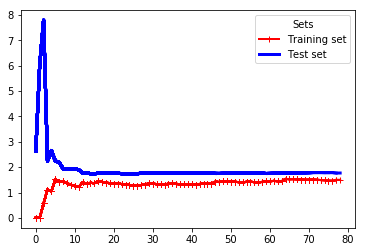

In [143]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()

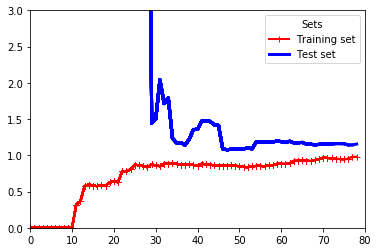

In [141]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(polynomial_regression, X, y)

plt.axis([0, 80, 0, 3])           # not shown
plt.show()